# Principle of AI 2. Assignment
## Imre Molnar (WKZINA)

In [231]:
import pandas as pd
import numpy as np

## Data exploration

### Data collection

**Playlist.json** - (preprocessed) A small portion of my saved music. It focuses on 5 artist
**TrackFeatures.json** - (preprocessed) the tracks' audio features like acousticness, danceability
**ArtistData.json** - (preprocessed) the artists and what kind of music are they produce (edm, house, etc.)

*preprocessed*: My spotify data did not contain these in this form and some additional data preprocessing and data collection was required. The track features and the different genres for the artists had to be collected based on my playlist using the Spotify API.

In [232]:
playlist = pd.read_json('data/Playlist.json')
features = pd.read_json('data/TrackFeatures.json')
artists = pd.read_json('data/ArtistData.json')

## Show examples from data
### Playlist

In [248]:
playlist = playlist.drop_duplicates(subset='trackName')
playlist[:5]

,trackName,artistName,albumName,trackUri
0,Aura,Avoure,U,spotify:track:0B2GWovtxzsh0a02PBbNl7
1,Ray,Avoure,This Time / Ray,spotify:track:3425OMM9bb64VMNXXldLvU
2,The Great Hope Design,Sevdaliza,The Great Hope Design,spotify:track:6D2whKQXHFzQtqPa5BXwPP
3,Avalon - Extended Mix,Theydream,Avalon,spotify:track:7CbVkrDeBTbhNWBWArsq4R
4,EXIT,Boris Brejcha,EXIT EP,spotify:track:6rOAVYBjRscPDf6oHbQ19b


### Artists

In [247]:
artists = artists.drop_duplicates(subset='name')
artists[:5]

,id,name,genres
0,0FrpdcVlJQqibaz5HfBUrL,Rick James,"[disco, funk, post-disco, quiet storm, soul, s..."
1,1zgNpeHQe8GulzfVkYP2VK,The Trammps,"[disco, philly soul, post-disco, quiet storm]"
2,4n7L1vYXp4Dt0HfxaLBj9l,Dazz Band,"[disco, electro, funk, post-disco, quiet storm..."
3,1EialtL6J5R7O0exgdgQ1w,Jackie Moore,"[classic soul, disco, post-disco]"
4,3mQBpAOMWYqAZyxtyeo4Lo,KC & The Sunshine Band,"[disco, funk]"


### Tracks' features

In [246]:
features = features.drop_duplicates(subset='trackName')
features[:5]

,trackName,artistName,albumName,trackUri,id,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Super Freak,Rick James,Disco Nights,spotify:track:25Kg03eyzr4MVvbVaFh2pl,25Kg03eyzr4MVvbVaFh2pl,0.882,0.600,9.0,-12.010,0.0,...,0.000144,0.0343,0.954,130.988,audio_features,spotify:track:25Kg03eyzr4MVvbVaFh2pl,https://api.spotify.com/v1/tracks/25Kg03eyzr4M...,https://api.spotify.com/v1/audio-analysis/25Kg...,198560.0,4.0
1,Disco Inferno,The Trammps,The Trammps,spotify:track:7bET0DUAs59D6BsbdTqXuw,7bET0DUAs59D6BsbdTqXuw,0.802,0.850,5.0,-6.342,1.0,...,0.001040,0.1130,0.923,128.007,audio_features,spotify:track:7bET0DUAs59D6BsbdTqXuw,https://api.spotify.com/v1/tracks/7bET0DUAs59D...,https://api.spotify.com/v1/audio-analysis/7bET...,218027.0,4.0
2,Let It Whip,Dazz Band,Keep It Live,spotify:track:2UCgWpa2r4ytWueNItYbWE,2UCgWpa2r4ytWueNItYbWE,0.820,0.838,9.0,-6.860,0.0,...,0.002280,0.0452,0.947,132.125,audio_features,spotify:track:2UCgWpa2r4ytWueNItYbWE,https://api.spotify.com/v1/tracks/2UCgWpa2r4yt...,https://api.spotify.com/v1/audio-analysis/2UCg...,281280.0,4.0
3,This Time Baby,Jackie Moore,I'm On My Way / With Your Love,spotify:track:04uistNIafvzVU7EOwDzGO,04uistNIafvzVU7EOwDzGO,0.806,0.814,10.0,-8.846,0.0,...,0.000852,0.0531,0.856,124.382,audio_features,spotify:track:04uistNIafvzVU7EOwDzGO,https://api.spotify.com/v1/tracks/04uistNIafvz...,https://api.spotify.com/v1/audio-analysis/04ui...,432840.0,4.0
4,"(Shake, Shake, Shake) Shake Your Booty",KC & The Sunshine Band,Part 3,spotify:track:4mn7iv4DYJxPYbPy5R0nPE,4mn7iv4DYJxPYbPy5R0nPE,0.651,0.945,10.0,-7.922,1.0,...,0.475000,0.1500,0.939,112.292,audio_features,spotify:track:4mn7iv4DYJxPYbPy5R0nPE,https://api.spotify.com/v1/tracks/4mn7iv4DYJxP...,https://api.spotify.com/v1/audio-analysis/4mn7...,185640.0,4.0


## Filter relevant part of the dataframe

### Get the artists that are in the playlist, and find their corresponding genres.

In [245]:
artist_set = set(playlist['artistName'].to_list()) # artists' name in playlist
artist_genre = artists.loc[artists['name'].isin(artist_set)]
artist_genre

,id,name,genres
14,37S9qlW44AiakSF45Vra1E,Avoure,[melodic techno]
58,5MraexJKZDrQYzS98kNwie,Sevdaliza,[alternative r&b]
327,5dNuHnFp9DGGOxoQx1WB5v,Theydream,[high-tech minimal]
330,6caPJFLv1wesmM7gwK1ACy,Boris Brejcha,"[high-tech minimal, minimal techno]"
360,762310PdDnwsDxAQxzQkfX,Depeche Mode,[synthpop]


### Get the tracks relevant features, and normalize values.

**danceability** - How appropriate the track is for dancing based on overall regularity, beat strength, rhythm stability, and tempo.
**energy** - How intense and active the track is, based on general entropy, onset rate, timbre, perceived loudness, and dynamic range.
**speechiness** - How present the spoken word are in the track.
**acousticness** - How likely the track is acoustic.
**instrumentalness** - How likely the track contains no spoken word vocals.
**valence** - How positive the track sounds
**tempo** - BPM

In [244]:
trackNames = playlist['trackName'].to_list()
trackFeatures = features.loc[features['trackName'].isin(trackNames)][['artistName','trackName','danceability','energy','speechiness','acousticness','instrumentalness','valence', 'tempo']]
trackFeatures['tempo'] = trackFeatures['tempo'] / 200
points = trackFeatures[['danceability','energy','speechiness','acousticness','instrumentalness','valence', 'tempo']]
labels = trackFeatures[['artistName', 'trackName']]
trackFeatures

,artistName,trackName,danceability,energy,speechiness,acousticness,instrumentalness,valence,tempo
17,Avoure,Aura,0.684,0.604,0.0471,0.004870,0.887000,0.3640,0.615000
18,Avoure,Ray,0.568,0.714,0.0330,0.025000,0.944000,0.5150,0.609925
71,Sevdaliza,The Great Hope Design,0.530,0.452,0.0524,0.327000,0.000969,0.2060,0.599970
404,Theydream,Avalon - Extended Mix,0.516,0.611,0.0564,0.003050,0.862000,0.1320,0.630230
407,Boris Brejcha,EXIT,0.732,0.592,0.0536,0.000691,0.818000,0.0560,0.624840
425,Boris Brejcha,Out Of Brain,0.797,0.631,0.0488,0.000207,0.875000,0.0737,0.625010
428,Boris Brejcha,Anthurie,0.805,0.734,0.0536,0.000409,0.841000,0.0911,0.625035
429,Boris Brejcha,Continuous DJ MIX by Boris Brejcha,0.797,0.721,0.0565,0.001460,0.827000,0.2430,0.625030
430,Boris Brejcha,I Will Blast Your Mind,0.791,0.823,0.0643,0.002130,0.709000,0.2670,0.625065
431,Boris Brejcha,In Memory of Love,0.799,0.709,0.0670,0.002180,0.873000,0.3560,0.625015


## Run K-means on the data set


In [238]:
from IPython.core.display import Markdown
from IPython.display import display, HTML

def pretty_print(u_labels):
    for i in u_labels:
        df_html = labels[['artistName', 'trackName']][label == i].to_html(index=False)
        display(Markdown(f'### Cluster: {i}'))
        display(HTML(df_html))

#### Finding different artists' style (n_clusters = 5)

The intuition was that, there are 5 artist in the dataset, and I would like to see if K-Means would create clusters that contains only one artist's tracks, so I set the hyperparameter *n_clusters* to 5. I used PCA to visualise the data hoping, that the found clusters would be visible. I ran K-Means on the PCA transformed data.

In [239]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(2)
data = pca.fit_transform(points)

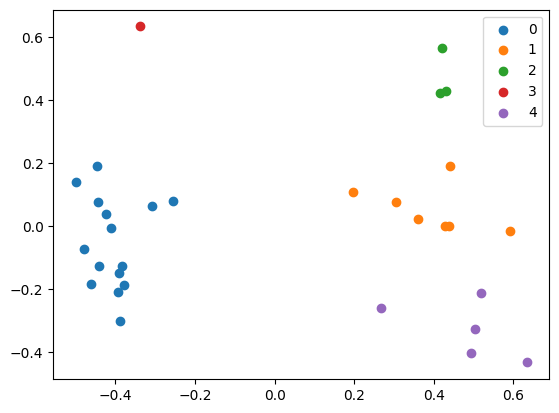

### Cluster: 0

artistName,trackName
Avoure,Aura
Avoure,Ray
Theydream,Avalon - Extended Mix
Boris Brejcha,EXIT
Boris Brejcha,Out Of Brain
Boris Brejcha,Anthurie
Boris Brejcha,Continuous DJ MIX by Boris Brejcha
Boris Brejcha,I Will Blast Your Mind
Boris Brejcha,In Memory of Love
Boris Brejcha,Spicy (feat. Ginger) - Edit


### Cluster: 1

artistName,trackName
Depeche Mode,It's No Good - 2007 Remaster
Depeche Mode,Policy of Truth - 2006 Remaster
Depeche Mode,Angel
Depeche Mode,Home
Depeche Mode,Heaven
Depeche Mode,Freestate
Depeche Mode,Blasphemous Rumours


### Cluster: 2

artistName,trackName
Depeche Mode,Personal Jesus - Original Single Version
Depeche Mode,Precious
Depeche Mode,Useless - 2007 Remaster


### Cluster: 3

artistName,trackName
Depeche Mode,World in My Eyes - 2006 Remaster


### Cluster: 4

artistName,trackName
Sevdaliza,The Great Hope Design
Sevdaliza,Human
Sevdaliza,Hubris
Sevdaliza,Bluecid
Sevdaliza,Amandine Insensible


In [242]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(data)
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.legend()
plt.show()

pretty_print(u_labels)

#### Finding clusters based on similarity of genres (n_clusters = 3)

Based on the previous results it looks like, that there is only three clusters. I think, that Avoure, Theydream and Boris Brejcha plays very similar music opposed to Sevdaliza and Depeche Mode, so there should be three groups. The first one should be **minimal techno**, the second one should be **synthpop**, and the third one should be **alternative r&b**.

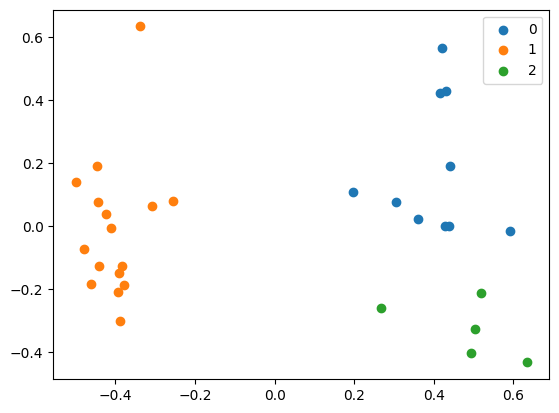

### Cluster: 0

artistName,trackName
Depeche Mode,It's No Good - 2007 Remaster
Depeche Mode,Personal Jesus - Original Single Version
Depeche Mode,Policy of Truth - 2006 Remaster
Depeche Mode,Precious
Depeche Mode,Angel
Depeche Mode,Useless - 2007 Remaster
Depeche Mode,Home
Depeche Mode,Heaven
Depeche Mode,Freestate
Depeche Mode,Blasphemous Rumours


### Cluster: 1

artistName,trackName
Avoure,Aura
Avoure,Ray
Theydream,Avalon - Extended Mix
Boris Brejcha,EXIT
Boris Brejcha,Out Of Brain
Boris Brejcha,Anthurie
Boris Brejcha,Continuous DJ MIX by Boris Brejcha
Boris Brejcha,I Will Blast Your Mind
Boris Brejcha,In Memory of Love
Boris Brejcha,Spicy (feat. Ginger) - Edit


### Cluster: 2

artistName,trackName
Sevdaliza,The Great Hope Design
Sevdaliza,Human
Sevdaliza,Hubris
Sevdaliza,Bluecid
Sevdaliza,Amandine Insensible


In [249]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(data)
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.legend()
plt.show()

pretty_print(u_labels)

### Results

When the algorithm tries to find 3 clusters the genres seem to be grouped quite well. Unfortunately, two songs from Depeche Mode are seemed to be more similar to the minimal techno tracks rather than the songs from the same artists.

### Personal Notes

I was surprised, that the groups are visible after PCA. I'm pretty sure, that if I introduce more songs, artists and genres the problem would get harder and harder, and it would introduce more outliers. In this case I tried to find at leas 5 different artist whose songs I like and I saved at least 4 songs from them.

I have found a lot of artist where I could not find the genre. I think it would be a great next step to train a model to detect the genres based on these features and fill out the missing ones.